In [17]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv("./Property_with_Feature_Engineering.csv")
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [19]:
inputs = df.drop(['property_id','location_id',  'province_name', 'price_bin','longitude','purpose','latitude','date_added','year','month','day','agency','agent'],axis='columns')
inputs.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,"Model Town, Lahore, Punjab",0,6 Kanal,120.0,32670.12,0
1,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,"Multan Road, Lahore, Punjab",5,1 Kanal,20.0,5445.02,5
2,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,"Eden, Lahore, Punjab",0,9 Marla,9.0,2450.26,3
3,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,"Gulberg, Lahore, Punjab",7,1 Kanal,20.0,5445.02,8
4,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,"Allama Iqbal Town, Lahore, Punjab",5,11 Marla,11.0,2994.76,6


In [20]:
inputs.shape

(191393, 11)

In [21]:
city=inputs.groupby('city')
city

In [22]:
isl=city.get_group('Islamabad')

In [23]:
isl.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
396,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,"G-10, Islamabad, Islamabad Capital",2,4 Marla,4.0,1089.00,2
397,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,"E-11, Islamabad, Islamabad Capital",3,5.6 Marla,5.6,1524.61,3
398,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5
399,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6
400,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4


In [24]:
isl.shape

(40195, 11)

In [25]:
raw=city.get_group('Rawalpindi')

In [26]:
dataframe=pd.concat([isl,raw], ignore_index=True)
dataframe.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,"G-10, Islamabad, Islamabad Capital",2,4 Marla,4.0,1089.00,2
1,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,"E-11, Islamabad, Islamabad Capital",3,5.6 Marla,5.6,1524.61,3
2,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5
3,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6
4,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4


In [27]:
dataframe.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [28]:
data= dataframe.groupby('property_type')

In [29]:
houses=data.get_group('House')

In [30]:
houses.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
2,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5
3,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6
4,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4
5,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,"DHA Defence, Islamabad, Islamabad Capital",3,8 Marla,8.0,2178.01,3
6,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,"Ghauri Town, Islamabad, Islamabad Capital",8,1.6 Kanal,32.0,8712.03,8


In [31]:
houses.shape

(36588, 11)

In [32]:
houses.to_csv("../Output/housesdata.csv")

In [33]:
flat=data.get_group('Flat')
flat.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,"G-10, Islamabad, Islamabad Capital",2,4 Marla,4.0,1089.00,2
1,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,"E-11, Islamabad, Islamabad Capital",3,5.6 Marla,5.6,1524.61,3
8,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,"E-11, Islamabad, Islamabad Capital",2,6.2 Marla,6.2,1687.96,2
11,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,"Diplomatic Enclave, Islamabad, Islamabad Capital",3,7.1 Marla,7.1,1932.98,3
12,https://www.zameen.com/Property/islamabad_dipl...,Flat,48000000,Diplomatic Enclave,Islamabad,"Diplomatic Enclave, Islamabad, Islamabad Capital",2,7.8 Marla,7.8,2123.56,2


In [34]:
flat.to_csv("../Flat/flatsdata.csv")

In [35]:
rent1=data.get_group('Lower Portion')
rent1.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
120,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",2,8 Marla,8.0,2178.01,2
124,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,Islamabad,"Islamabad Expressway, Islamabad, Islamabad Cap...",2,5 Marla,5.0,1361.25,2
127,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,Islamabad,"F-6, Islamabad, Islamabad Capital",3,16 Marla,16.0,4356.02,3
129,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,Islamabad,"G-8, Islamabad, Islamabad Capital",2,9.3 Marla,9.3,2531.93,2
132,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",0,1 Kanal,20.0,5445.02,3


In [36]:
rent2=data.get_group('Upper Portion')
rent2.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
122,https://www.zameen.com/Property/islamabad_bhar...,Upper Portion,12000,Bhara kahu,Islamabad,"Bhara kahu, Islamabad, Islamabad Capital",2,5 Marla,5.0,1361.25,2
131,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,70000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",3,1 Kanal,20.0,5445.02,3
134,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,75000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",3,1 Kanal,20.0,5445.02,3
137,https://www.zameen.com/Property/bahria_town_ba...,Upper Portion,40000,Bahria Town,Islamabad,"Bahria Town, Islamabad, Islamabad Capital",3,10 Marla,10.0,2722.51,3
138,https://www.zameen.com/Property/f_10_f_10_4_50...,Upper Portion,80000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",3,1 Kanal,20.0,5445.02,3


In [37]:
rent=pd.concat([rent1,rent2], ignore_index=True)
rent.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",2,8 Marla,8.0,2178.01,2
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,Islamabad,"Islamabad Expressway, Islamabad, Islamabad Cap...",2,5 Marla,5.0,1361.25,2
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,Islamabad,"F-6, Islamabad, Islamabad Capital",3,16 Marla,16.0,4356.02,3
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,Islamabad,"G-8, Islamabad, Islamabad Capital",2,9.3 Marla,9.3,2531.93,2
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",0,1 Kanal,20.0,5445.02,3


In [38]:
rent.shape

(15385, 11)

In [39]:
rent.to_csv("../Output/rentdata.csv")

In [40]:
houses.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
2,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5
3,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6
4,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4
5,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,"DHA Defence, Islamabad, Islamabad Capital",3,8 Marla,8.0,2178.01,3
6,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,"Ghauri Town, Islamabad, Islamabad Capital",8,1.6 Kanal,32.0,8712.03,8


In [41]:
header_names=['House_url', 'Property_type','Price','House_location','City','House_title','baths','total_area','area_marla','area_sqft','beds']

In [42]:
df=pd.read_csv("../Output/housesdata.csv",header=None,skiprows=1, names=header_names)

In [43]:
df.head()

,House_url,Property_type,Price,House_location,City,House_title,baths,total_area,area_marla,area_sqft,beds
2,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5
3,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6
4,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4
5,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,"DHA Defence, Islamabad, Islamabad Capital",3,8 Marla,8.0,2178.01,3
6,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,"Ghauri Town, Islamabad, Islamabad Capital",8,1.6 Kanal,32.0,8712.03,8


In [44]:
df['total_sqft']=df['area_sqft'].astype(int)
df.head()

,House_url,Property_type,Price,House_location,City,House_title,baths,total_area,area_marla,area_sqft,beds,total_sqft
2,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",6,8 Marla,8.0,2178.01,5,2178
3,https://www.zameen.com/Property/islamabad_f_10...,House,70000000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",6,1.5 Kanal,30.0,8167.53,6,8167
4,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,"Bani Gala, Islamabad, Islamabad Capital",4,2 Kanal,40.0,10890.04,4,10890
5,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,"DHA Defence, Islamabad, Islamabad Capital",3,8 Marla,8.0,2178.01,3,2178
6,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,"Ghauri Town, Islamabad, Islamabad Capital",8,1.6 Kanal,32.0,8712.03,8,8712


In [45]:
df1=df.drop(['House_title','House_url','total_area','area_sqft'], axis=1)
df1.head()

,Property_type,Price,House_location,City,baths,area_marla,beds,total_sqft
2,House,16500000,G-15,Islamabad,6,8.0,5,2178
3,House,70000000,F-10,Islamabad,6,30.0,6,8167
4,House,43500000,Bani Gala,Islamabad,4,40.0,4,10890
5,House,7000000,DHA Defence,Islamabad,3,8.0,3,2178
6,House,34500000,Ghauri Town,Islamabad,8,32.0,8,8712


In [47]:
def no_of_kitchen(x):
    if x>=5:
        return 2 
    if x<=4:
        return 1
def no_of_tv(x):
    if x>=4:
        return 2
    if x<=3:
        return 1
def pantry_room(x):
    if x>=5:
        return 1 
    if x<=4:
        return 0

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36588 entries, 2 to 63092
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Property_type   36588 non-null  object 
 1   Price           36588 non-null  int64  
 2   House_location  36588 non-null  object 
 3   City            36588 non-null  object 
 4   baths           36588 non-null  int64  
 5   area_marla      36588 non-null  float64
 6   beds            36588 non-null  int64  
 7   total_sqft      36588 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 2.4+ MB


In [49]:
df1.isnull().sum()

Property_type     0
Price             0
House_location    0
City              0
baths             0
area_marla        0
beds              0
total_sqft        0
dtype: int64

In [50]:
df1.area_marla.describe()

count     36588.000000
mean         18.819031
std         702.243289
min           0.000000
25%           5.000000
50%          10.000000
75%          20.000000
max      124444.000000
Name: area_marla, dtype: float64

In [51]:
df1.area_marla.mean()

18.819030829780253

In [52]:
ds = df1.isin([np.inf, -np.inf])
ds

,Property_type,Price,House_location,City,baths,area_marla,beds,total_sqft
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
63087,False,False,False,False,False,False,False,False
63088,False,False,False,False,False,False,False,False
63089,False,False,False,False,False,False,False,False
63090,False,False,False,False,False,False,False,False


In [53]:
c = np.isinf(df1['area_marla']).values.sum()
c

0

In [54]:
df1.head()

,Property_type,Price,House_location,City,baths,area_marla,beds,total_sqft
2,House,16500000,G-15,Islamabad,6,8.0,5,2178
3,House,70000000,F-10,Islamabad,6,30.0,6,8167
4,House,43500000,Bani Gala,Islamabad,4,40.0,4,10890
5,House,7000000,DHA Defence,Islamabad,3,8.0,3,2178
6,House,34500000,Ghauri Town,Islamabad,8,32.0,8,8712


In [55]:
df1['area']=df1['area_marla'].astype(int)
df1.head()

,Property_type,Price,House_location,City,baths,area_marla,beds,total_sqft,area
2,House,16500000,G-15,Islamabad,6,8.0,5,2178,8
3,House,70000000,F-10,Islamabad,6,30.0,6,8167,30
4,House,43500000,Bani Gala,Islamabad,4,40.0,4,10890,40
5,House,7000000,DHA Defence,Islamabad,3,8.0,3,2178,8
6,House,34500000,Ghauri Town,Islamabad,8,32.0,8,8712,32


In [56]:
df2=df1.drop(['area_marla'], axis=1)
df2.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area
2,House,16500000,G-15,Islamabad,6,5,2178,8
3,House,70000000,F-10,Islamabad,6,6,8167,30
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32


In [57]:
a = np.isinf(df2['area']).values.sum()
a

0

In [58]:
df2['kitchens']= df2['area'].apply(no_of_kitchen).astype(int)
df2.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens
2,House,16500000,G-15,Islamabad,6,5,2178,8,2
3,House,70000000,F-10,Islamabad,6,6,8167,30,2
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2


In [59]:
df2['tv_lounge']= df2['area'].apply(no_of_tv).astype(int)
df2.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2


In [60]:
df2['store']= df2['area'].apply(pantry_room).astype(int)
df2.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1


In [61]:
df2.shape

(36588, 11)

### WE have applied the business logic by discussing with architect for generating the random values for kitchen, store room and tv lounge.

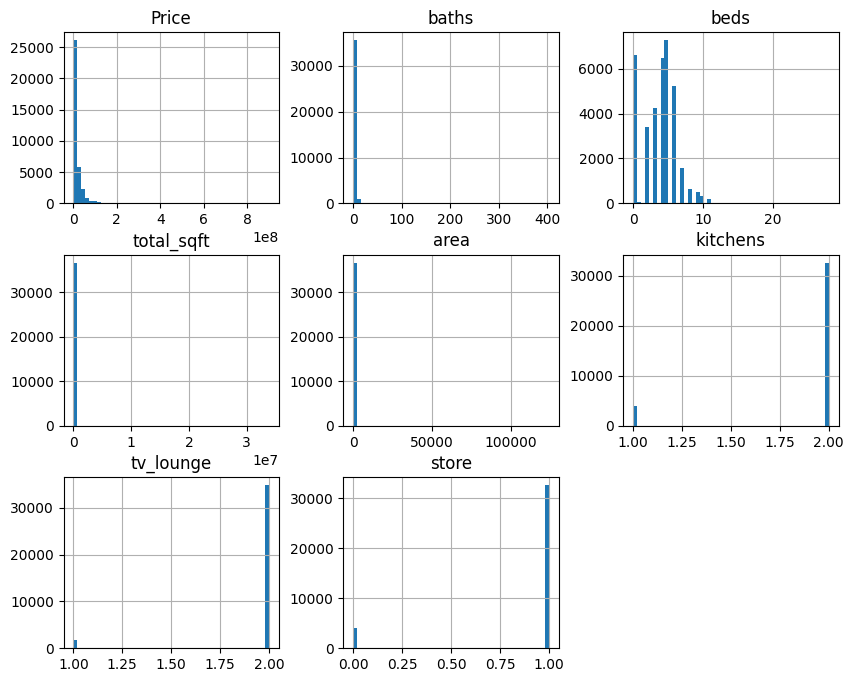

In [62]:
import matplotlib.pyplot as plt
df2.hist(bins=50, figsize=(10, 8))
plt.show()

In [63]:
df2['beds'].unique()

array([ 5,  6,  4,  3,  8,  7,  0, 10,  2,  9,  1, 11, 12, 16, 18, 15, 21,
       14, 13, 28, 27], dtype=int64)

In [64]:
df2[df2.beds>12].count()

Property_type     20
Price             20
House_location    20
City              20
baths             20
beds              20
total_sqft        20
area              20
kitchens          20
tv_lounge         20
store             20
dtype: int64

In [65]:
location_stats_beds_greater_then_12 = df2[df2.beds<=12]
location_stats_beds_greater_then_12

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
63087,House,25000,Bahria Town Rawalpindi,Rawalpindi,2,2,1361,5,2,2,1
63088,House,65000,Bahria Town Rawalpindi,Rawalpindi,6,5,2722,10,2,2,1
63089,House,65000,Gulraiz Housing Scheme,Rawalpindi,6,6,2722,10,2,2,1
63090,House,45000,Gulraiz Housing Scheme,Rawalpindi,6,4,1361,5,2,2,1


In [66]:
len(location_stats_beds_greater_then_12)

36568

In [67]:
df3=location_stats_beds_greater_then_12

In [68]:
df3.beds.unique()

array([ 5,  6,  4,  3,  8,  7,  0, 10,  2,  9,  1, 11, 12], dtype=int64)

In [69]:
dd=df3[df3.beds<1]

In [70]:
dd.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store
14,House,400000000,F-6,Islamabad,0,0,24502,90,2,2,1
171,House,60000,DHA Defence,Islamabad,0,0,2994,11,2,2,1
217,House,110000000,F-8,Islamabad,9,0,5445,20,2,2,1
236,House,4700000,Ghauri Town,Islamabad,0,0,1089,4,1,2,0
238,House,170000000,E-11,Islamabad,0,0,10890,40,2,2,1


In [71]:
location_stats_beds_greater_then_1 = df3[df3.beds>0]
location_stats_beds_greater_then_1

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
63087,House,25000,Bahria Town Rawalpindi,Rawalpindi,2,2,1361,5,2,2,1
63088,House,65000,Bahria Town Rawalpindi,Rawalpindi,6,5,2722,10,2,2,1
63089,House,65000,Gulraiz Housing Scheme,Rawalpindi,6,6,2722,10,2,2,1
63090,House,45000,Gulraiz Housing Scheme,Rawalpindi,6,4,1361,5,2,2,1


In [72]:
df4= location_stats_beds_greater_then_1

In [73]:
df4.beds.unique()

array([ 5,  6,  4,  3,  8,  7, 10,  2,  9,  1, 11, 12], dtype=int64)

In [74]:
df4['price_per_sqft']=df4['Price']/df4['total_sqft']
df4.head()

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\1716968204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft']=df4['Price']/df4['total_sqft']


,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1,7575.757576
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1,8571.078731
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1,3994.490358
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1,3213.957759
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1,3960.055096


### How Many Locations We have and No of rows for that location

In [75]:
df4.House_location.unique()

array(['G-15', 'F-10', 'Bani Gala', 'DHA Defence', 'Ghauri Town',
       'Korang Town', 'Bahria Town', 'B-17', 'G-11', 'Bhara kahu',
       'Garden Town', 'Koral Town', 'Soan Garden', 'F-6', 'F-7', 'I-16',
       'E-7', 'Emaar Canyon Views', 'G-13', 'F-17', 'PWD Housing Scheme',
       'F-11', 'Kuri Road', 'Pakistan Town', 'G-10', 'Chatha Bakhtawar',
       'E-11', 'F-8', 'National Police Foundation O-9', 'I-8',
       'Lehtarar Road', 'G-9', 'E-14', 'G-8', 'I-14', 'Tarlai',
       'Simly Dam Road', 'I-9', 'Burma Town', 'Naval Anchorage',
       'Islamabad Highway', 'CBR Town', 'Jhang Syedan', 'D-17',
       'Arsalan Town', 'Kashmir Highway', 'I-10', 'Pir Sohawa', 'Ali Pur',
       'FECHS', 'Khanna Pul', 'Shaheen Town', 'Chak Shahzad', 'H-13',
       'G-14', 'National Police Foundation', 'Shah Allah Ditta',
       'Islamabad Expressway', 'Margalla Town', 'Tarnol', 'H-15', 'D-13',
       'NIH Colony', 'Meherban Colony', 'Zaraj Housing Scheme',
       'Multi Residencia & Orchards', 'Jhan

In [76]:
len(df4.House_location.unique())

432

### Getting the count of rows for one of the specfic location

In [77]:
df4.House_location=df4.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

location_stats=df4.groupby('House_location')['House_location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\2716029503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.House_location=df4.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


House_location
Bahria Town Rawalpindi            4919
DHA Defence                       1730
G-13                              1461
Bahria Town                       1129
Adiala Road                       1005
                                  ... 
H-8                                  1
Riaz Qureshi Road                    1
Islamabad Enclave                    1
Rawat Industrial Estate              1
Hakim Muhammad Ajmal Khan Road       1
Name: House_location, Length: 432, dtype: int64

In [78]:
location_stats_less_than_8 = location_stats[location_stats<8]
location_stats_less_than_8

House_location
Kalma Chowk                       7
Sohan Valley                      7
Commercial Market                 7
National Garden Housing Scheme    7
New Shakrial                      7
                                 ..
H-8                               1
Riaz Qureshi Road                 1
Islamabad Enclave                 1
Rawat Industrial Estate           1
Hakim Muhammad Ajmal Khan Road    1
Name: House_location, Length: 223, dtype: int64

In [79]:
len(location_stats[location_stats>7])

209

In [80]:
df4.House_location = df4.House_location.apply(lambda x: 'other' if x in location_stats_less_than_8 else x)
len(df4.House_location.unique())

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\3299209062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.House_location = df4.House_location.apply(lambda x: 'other' if x in location_stats_less_than_8 else x)


210

In [81]:
df5=df4

In [82]:
df5.House_location=df5.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

stats=df5.groupby('House_location')['House_location'].agg('count').sort_values(ascending=False)
stats

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\4092821614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.House_location=df5.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


House_location
Bahria Town Rawalpindi    4919
DHA Defence               1730
G-13                      1461
Bahria Town               1129
Adiala Road               1005
                          ... 
Lalarukh Colony              8
Friends Colony               8
Fazaia Colony                8
Aslam Shaheed Road           8
Spring Valley                8
Name: House_location, Length: 210, dtype: int64

Outlier Removal Using Business Logic As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 150 sqft 

In [83]:
df5= df5[~(df5.total_sqft/df5.beds<150)]
df5.shape

(29812, 12)

In [84]:
df5.House_location.unique()

array(['G-15', 'F-10', 'Bani Gala', 'DHA Defence', 'Ghauri Town',
       'Korang Town', 'Bahria Town', 'B-17', 'G-11', 'Bhara kahu',
       'Garden Town', 'Koral Town', 'Soan Garden', 'F-6', 'F-7', 'other',
       'E-7', 'Emaar Canyon Views', 'G-13', 'F-17', 'PWD Housing Scheme',
       'F-11', 'Kuri Road', 'Pakistan Town', 'G-10', 'Chatha Bakhtawar',
       'E-11', 'F-8', 'National Police Foundation O-9', 'I-8',
       'Lehtarar Road', 'G-9', 'G-8', 'I-14', 'Tarlai', 'Simly Dam Road',
       'I-9', 'Burma Town', 'Naval Anchorage', 'Islamabad Highway',
       'CBR Town', 'Jhang Syedan', 'D-17', 'Arsalan Town',
       'Kashmir Highway', 'I-10', 'Ali Pur', 'FECHS', 'Shaheen Town',
       'Chak Shahzad', 'H-13', 'G-14', 'National Police Foundation',
       'Shah Allah Ditta', 'Islamabad Expressway', 'Margalla Town',
       'Tarnol', 'Meherban Colony', 'Zaraj Housing Scheme',
       'Jhangi Syedan', 'PAEC Employees Cooperative Housing Society',
       'Taramrri', 'G-16', 'Spring Valley', '

In [85]:
df5.head()

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1,7575.757576
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1,8571.078731
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1,3994.490358
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1,3213.957759
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1,3960.055096


In [86]:
df4['price_per_sqft'].dropna(inplace=True)
df4

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\2976017942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft'].dropna(inplace=True)


,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
2,House,16500000,G-15,Islamabad,6,5,2178,8,2,2,1,7575.757576
3,House,70000000,F-10,Islamabad,6,6,8167,30,2,2,1,8571.078731
4,House,43500000,Bani Gala,Islamabad,4,4,10890,40,2,2,1,3994.490358
5,House,7000000,DHA Defence,Islamabad,3,3,2178,8,2,2,1,3213.957759
6,House,34500000,Ghauri Town,Islamabad,8,8,8712,32,2,2,1,3960.055096
...,...,...,...,...,...,...,...,...,...,...,...,...
63087,House,25000,Bahria Town Rawalpindi,Rawalpindi,2,2,1361,5,2,2,1,18.368846
63088,House,65000,Bahria Town Rawalpindi,Rawalpindi,6,5,2722,10,2,2,1,23.879500
63089,House,65000,Gulraiz Housing Scheme,Rawalpindi,6,6,2722,10,2,2,1,23.879500
63090,House,45000,Gulraiz Housing Scheme,Rawalpindi,6,4,1361,5,2,2,1,33.063924


In [87]:
df5.price_per_sqft.describe()

count     29812.000000
mean       5531.170542
std        5388.940744
min           0.000735
25%          41.322314
50%        5205.143907
75%        8266.993264
max      117279.124316
Name: price_per_sqft, dtype: float64

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('House_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(19002, 12)

In [89]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

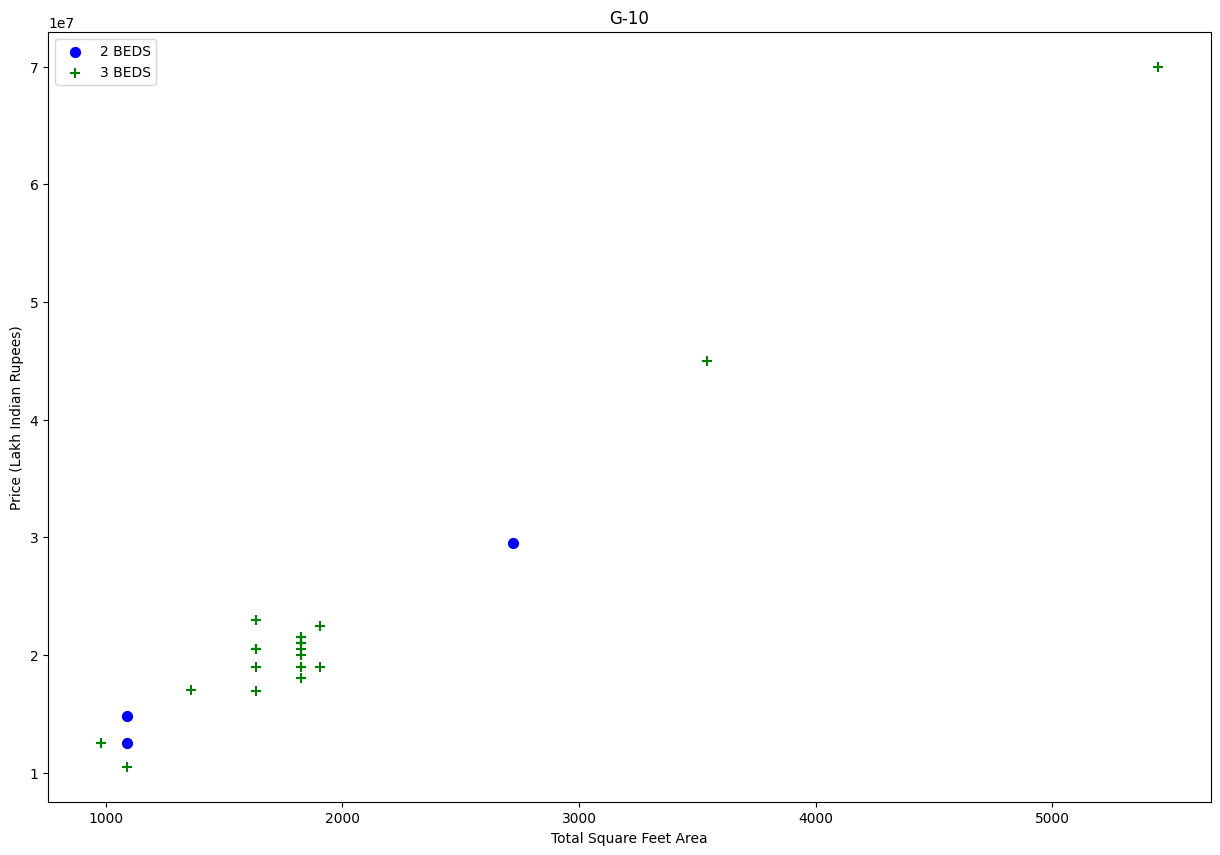

In [90]:
def plot_scatter_chart(df,location):
    beds2 = df[(df.House_location==location) & (df.beds==2)]
    beds3 = df[(df.House_location==location) & (df.beds==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2.total_sqft,beds2.Price,color='blue',label='2 BEDS', s=50)
    plt.scatter(beds3.total_sqft,beds3.Price,marker='+', color='green',label='3 BEDS', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"G-10")

#### We should also remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bedrooms

LIKE
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

the Main reason is  we can remove those 2 Bed house whose price_per_sqft is less than mean price_per_sqft of 1 Bed house

In [91]:
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('House_location'):
        beds_stats = {}
        #Creating dataframe on the basis of beds for each location 
        for beds, beds_df in location_df.groupby('beds'):
            beds_stats[beds] = {
                'mean': np.mean(beds_df.price_per_sqft),
                'std': np.std(beds_df.price_per_sqft),
                'count': beds_df.shape[0]
            }
            #excluding the data points whose values are less then previous mean Beds 
        for beds, beds_df in location_df.groupby('beds'):
            stats = beds_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, beds_df[beds_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_beds_outliers(df6)

df7.shape

(11912, 12)

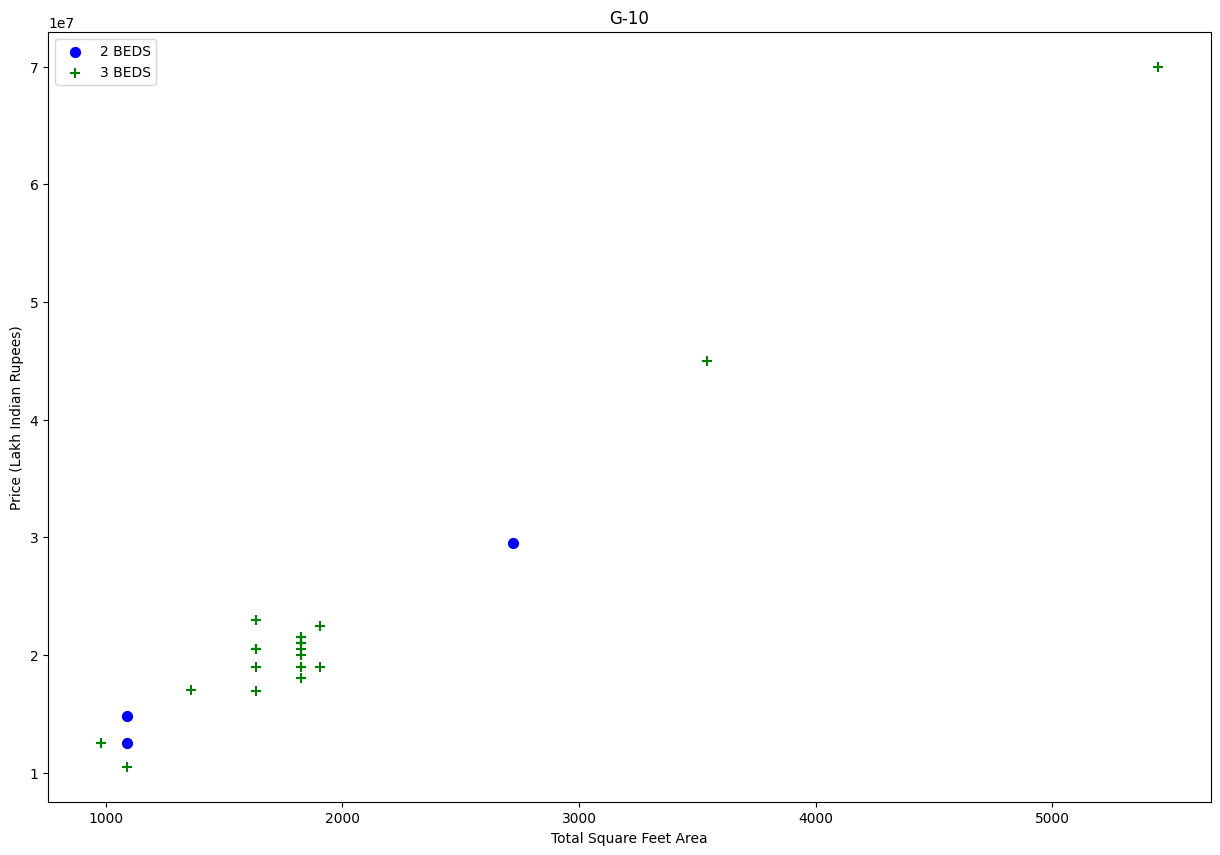

In [92]:
plot_scatter_chart(df6,"G-10")

Text(0, 0.5, 'Count')

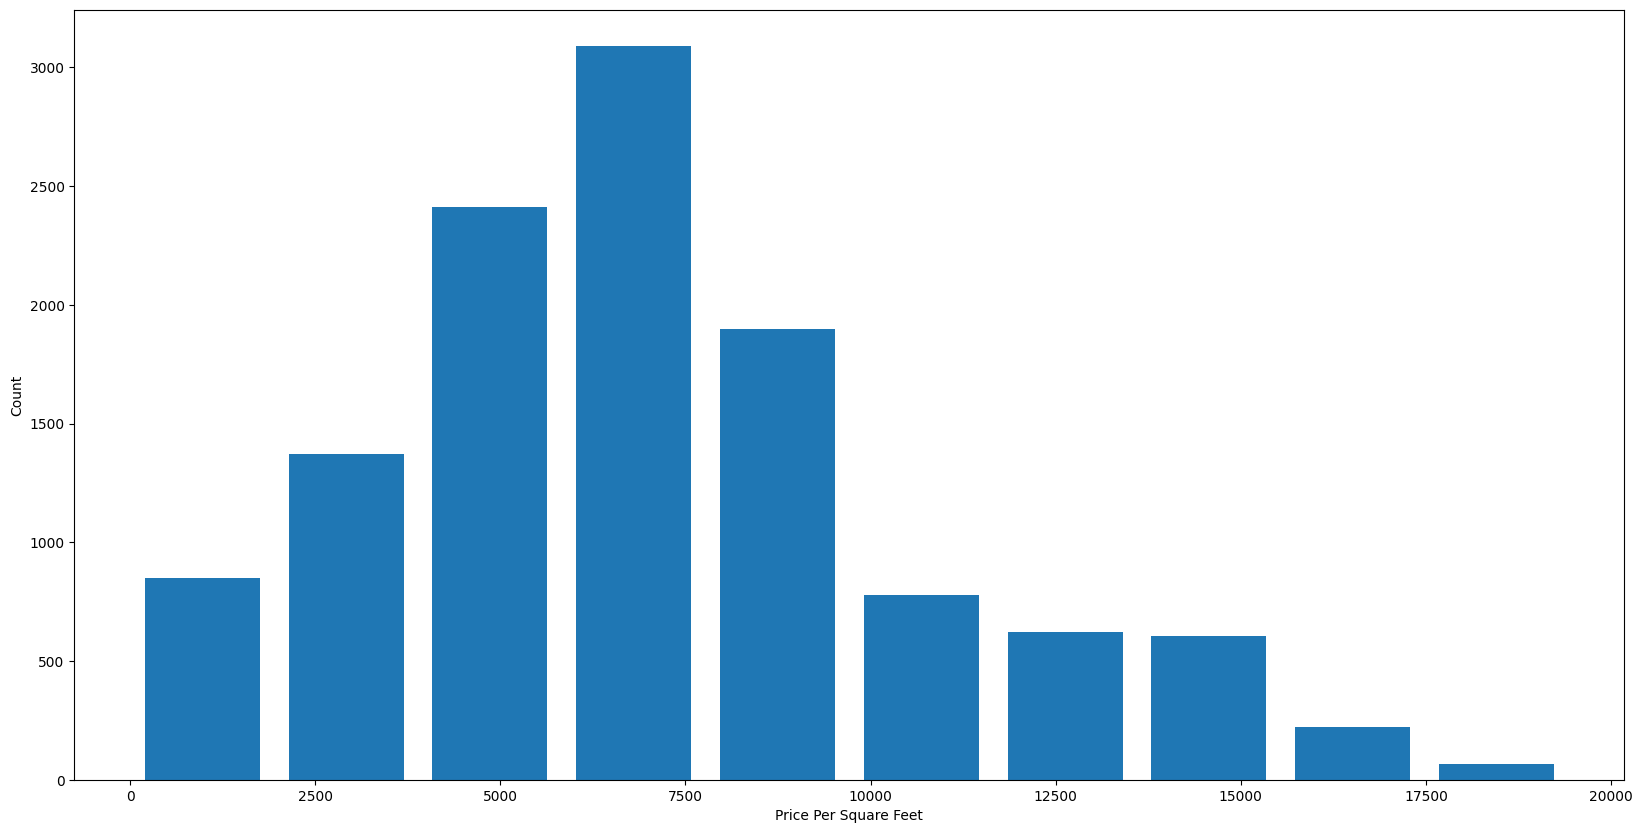

In [93]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [94]:
location_stats_Price_PER_Sqft = df7[(df7.price_per_sqft>=500) & (df6.price_per_sqft<=50000 )]
location_stats_Price_PER_Sqft

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\2019309655.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_stats_Price_PER_Sqft = df7[(df7.price_per_sqft>=500) & (df6.price_per_sqft<=50000 )]


,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
26,House,2600000,Adiala Road,Rawalpindi,1,2,544,2,1,1,0,4779.411765
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [95]:
df8=location_stats_Price_PER_Sqft
len(df8)

11124

In [96]:
df8.baths.unique()

array([  4,   3,   1,   5,   2,   7,   8,   6,   0,  10,   9,  11,  12,
       403], dtype=int64)

In [97]:
location_stats_baths_equal_to_1 = df8[(df8.beds>=1) & (df8.baths>=1 )]
location_stats_baths_equal_to_1

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
26,House,2600000,Adiala Road,Rawalpindi,1,2,544,2,1,1,0,4779.411765
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [98]:
location_stats_baths_equal_to_1

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
26,House,2600000,Adiala Road,Rawalpindi,1,2,544,2,1,1,0,4779.411765
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [99]:
df9=location_stats_baths_equal_to_1

Text(0, 0.5, 'Count')

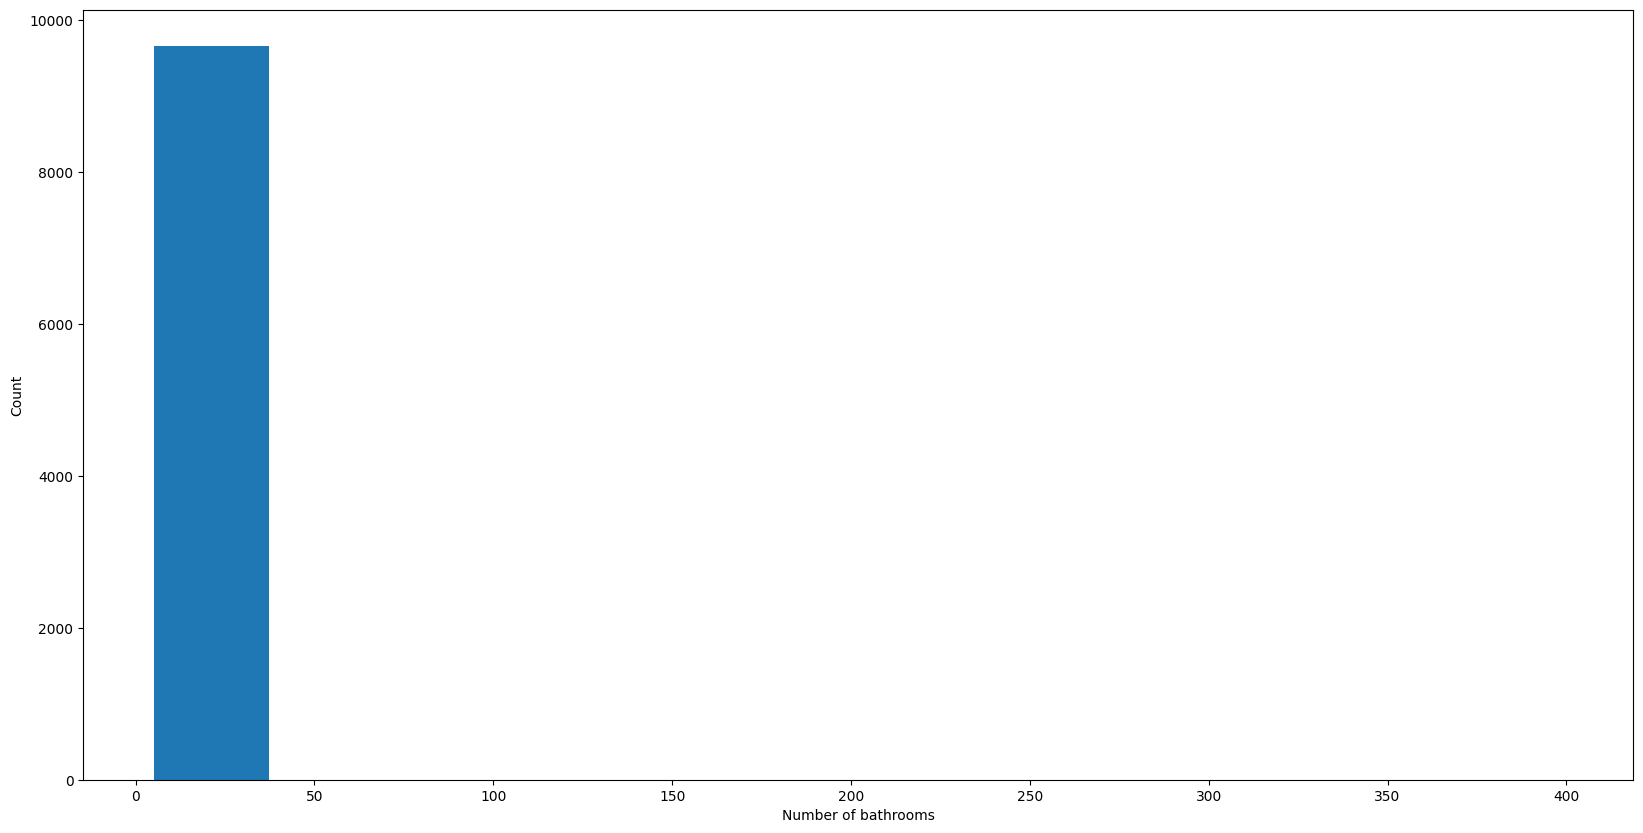

In [100]:
plt.hist(df9.baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [101]:
location_stats_baths_less_then_12 = df9[(df9.baths>=2) & (df9.baths<=12)]
location_stats_baths_less_then_12

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
31,House,6000000,Adiala Road,Rawalpindi,3,3,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [102]:
df10=location_stats_baths_less_then_12

In [103]:
df10.shape

(9537, 12)

In [104]:
df10['baths'].unique()

array([ 4,  3,  5,  2,  7,  8,  6, 10,  9, 11, 12], dtype=int64)

Text(0, 0.5, 'Count')

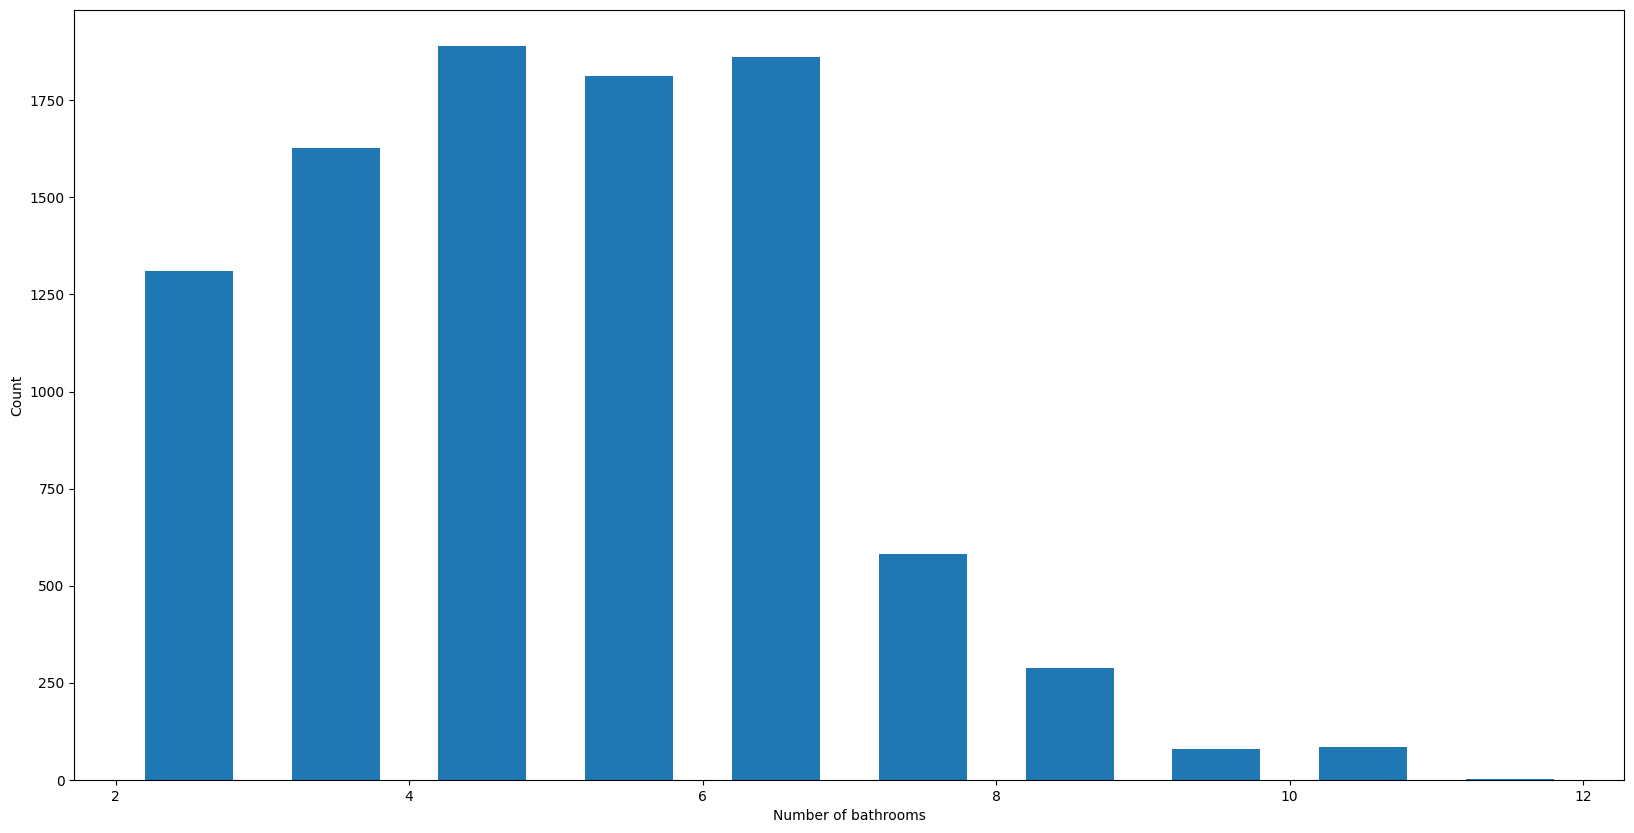

In [105]:
plt.hist(df10.baths,rwidth=0.6)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

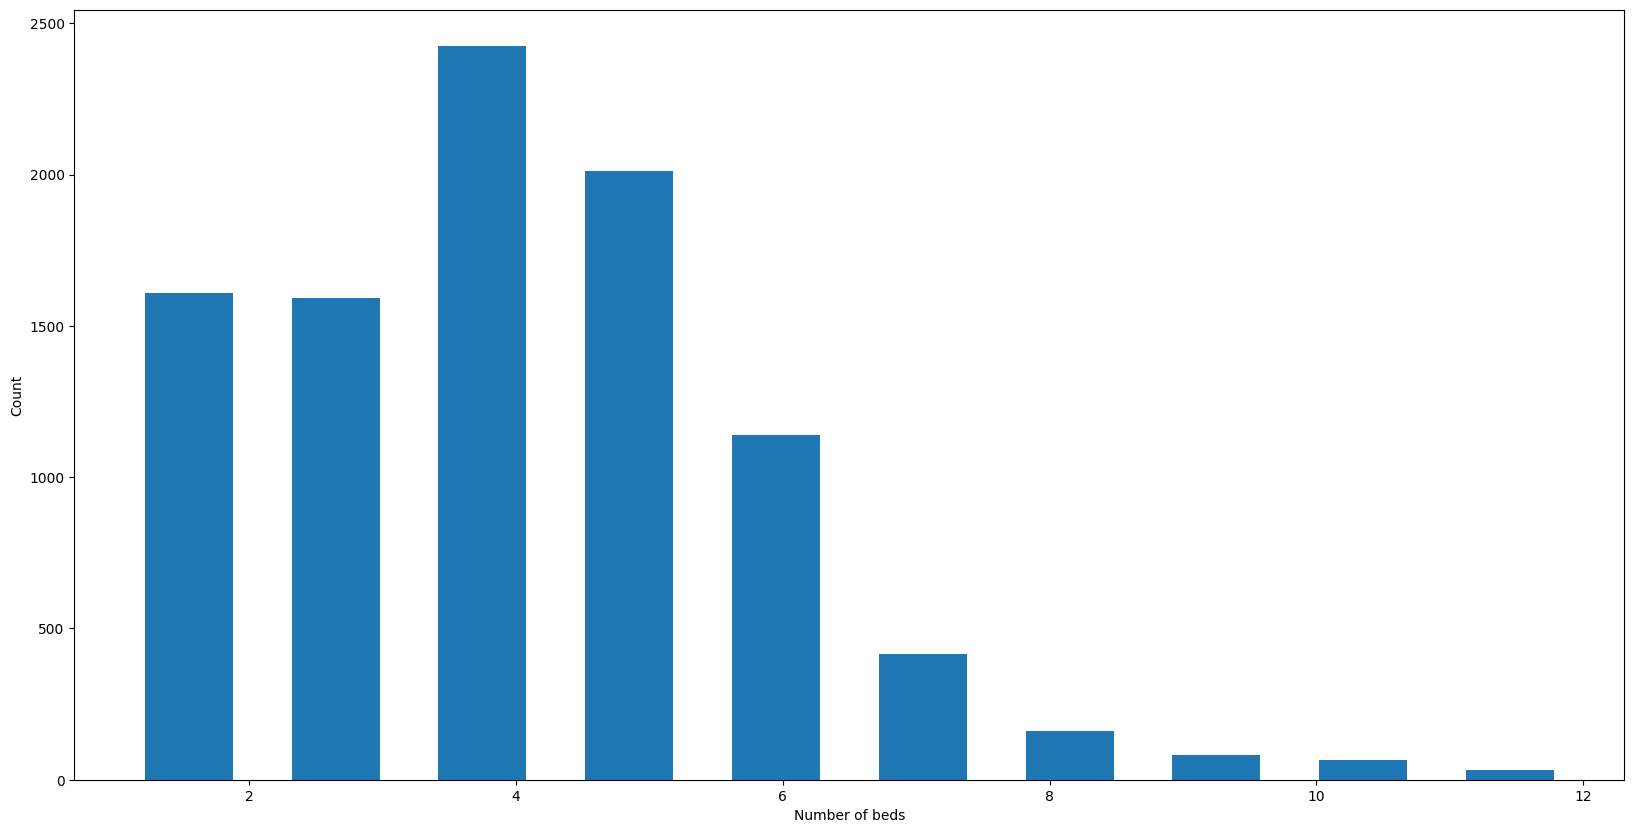

In [106]:
plt.hist(df10.beds,rwidth=0.6)
plt.xlabel("Number of beds")
plt.ylabel("Count")

In [107]:
stats_of_beds = df10[(df10.beds>=2) & (df10.beds<=8)]
stats_of_beds

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
31,House,6000000,Adiala Road,Rawalpindi,3,3,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [108]:
df11=stats_of_beds
df11.shape

(9337, 12)

In [109]:
stats_of_baths = df11[(df11.baths>=2) & (df11.baths<=8)]
stats_of_baths

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
21,House,5800000,Adiala Road,Rawalpindi,4,4,1361,5,2,2,1,4261.572373
23,House,6000000,Adiala Road,Rawalpindi,3,3,1361,5,2,2,1,4408.523145
27,House,12000000,Adiala Road,Rawalpindi,5,5,2722,10,2,2,1,4408.523145
29,House,6000000,Adiala Road,Rawalpindi,5,4,1633,6,2,2,1,3674.219228
31,House,6000000,Adiala Road,Rawalpindi,3,3,1633,6,2,2,1,3674.219228
...,...,...,...,...,...,...,...,...,...,...,...,...
18996,House,10000000,other,Rawalpindi,5,6,1633,6,2,2,1,6123.698714
18997,House,75000000,other,Rawalpindi,6,6,8712,32,2,2,1,8608.815427
18999,House,12000000,other,Rawalpindi,8,8,1225,4,1,2,0,9795.918367
19000,House,4500000,other,Rawalpindi,2,2,1361,5,2,2,1,3306.392359


In [110]:
df12=stats_of_baths

Text(0, 0.5, 'Count')

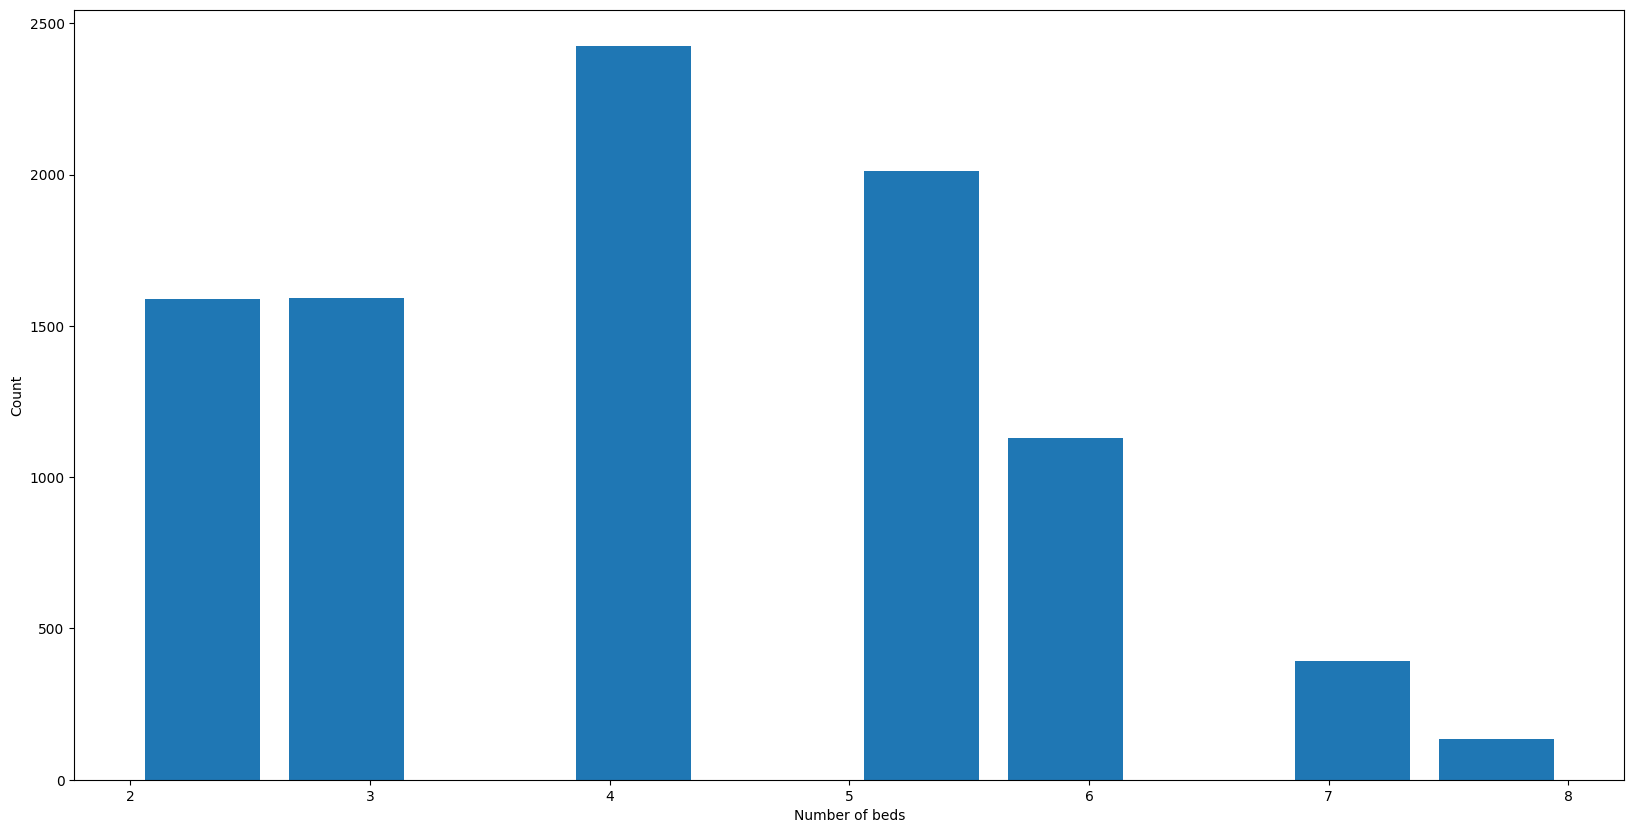

In [111]:
plt.hist(df12.beds,rwidth=0.8)
plt.xlabel("Number of beds")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

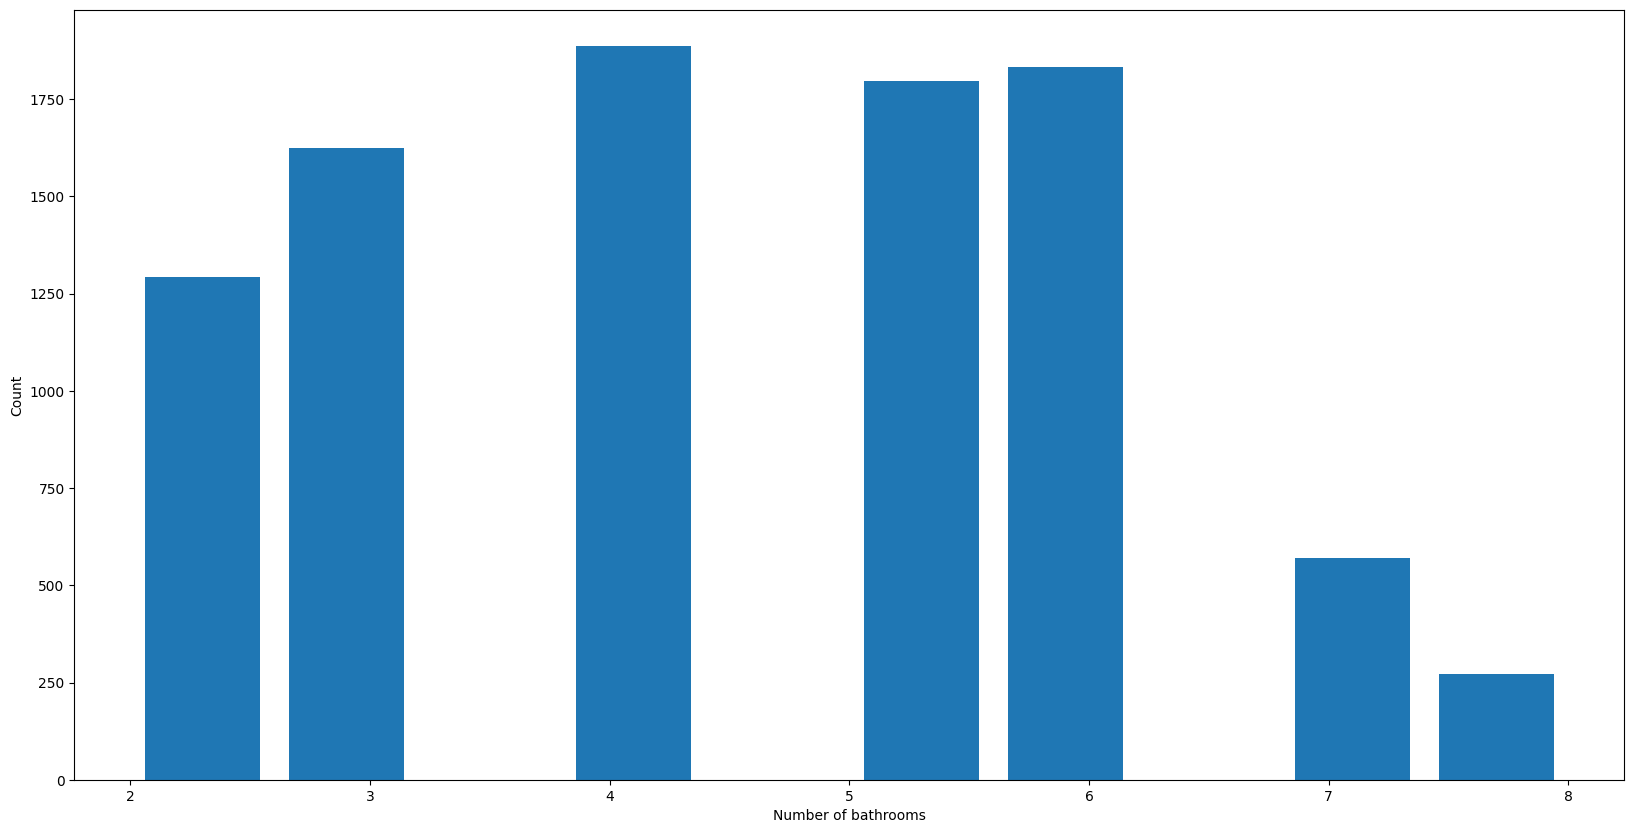

In [112]:
plt.hist(df12.baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [113]:
df12[df12.baths>df12.beds+3]

,Property_type,Price,House_location,City,baths,beds,total_sqft,area,kitchens,tv_lounge,store,price_per_sqft
5443,House,7500000,Bhara kahu,Islamabad,8,3,1905,7,2,2,1,3937.007874
6375,House,11700000,D-17,Islamabad,8,4,2531,9,2,2,1,4622.678783
6505,House,20000000,DHA Defence,Islamabad,8,4,2994,11,2,2,1,6680.026720
7413,House,4200000,Dhamyal Road,Rawalpindi,6,2,1361,5,2,2,1,3085.966201
7432,House,4200000,Dhamyal Road,Rawalpindi,6,2,1361,5,2,2,1,3085.966201
13771,House,12000000,Gulistan Colony,Rawalpindi,8,4,1905,7,2,2,1,6299.212598
15841,House,29000000,Lalazar,Rawalpindi,6,2,7078,26,2,2,1,4097.202600
15981,House,21000000,Media Town,Rawalpindi,6,2,2722,10,2,2,1,7714.915503


### if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [114]:
df13 = df12[df12.baths<df12.beds+2]
df13.shape

(8721, 12)

In [115]:
df13.drop(['price_per_sqft','area','City','Property_type'],axis='columns',inplace=True)
df13.head()

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\1823760455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13.drop(['price_per_sqft','area','City','Property_type'],axis='columns',inplace=True)


,Price,House_location,baths,beds,total_sqft,kitchens,tv_lounge,store
21,5800000,Adiala Road,4,4,1361,2,2,1
23,6000000,Adiala Road,3,3,1361,2,2,1
27,12000000,Adiala Road,5,5,2722,2,2,1
29,6000000,Adiala Road,5,4,1633,2,2,1
31,6000000,Adiala Road,3,3,1633,2,2,1


In [116]:
df13.House_location=df13.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

location_stats1=df12.groupby('House_location')['House_location'].agg('count').sort_values(ascending=False)
location_stats1

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\2801570467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13.House_location=df13.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


House_location
Bahria Town Rawalpindi    1615
DHA Defence                643
Bahria Town                419
Ghauri Town                387
G-13                       357
                          ... 
Shehzad Town                 2
Bilal Colony                 2
E-7                          1
Ideal Homes Society          1
Haji Chowk                   1
Name: House_location, Length: 207, dtype: int64

In [117]:
len(location_stats1)

207

In [118]:
len(location_stats1[location_stats1>=8])

137

In [119]:
location_stats_less = location_stats1[location_stats1<8]
location_stats_less

House_location
Chaklala               7
Koral Town             7
Shams Abad             7
Pindora                7
Fazal Town             7
                      ..
Shehzad Town           2
Bilal Colony           2
E-7                    1
Ideal Homes Society    1
Haji Chowk             1
Name: House_location, Length: 70, dtype: int64

In [120]:
df13.House_location = df13.House_location.apply(lambda x: 'other' if x in location_stats_less else x)
len(df13.House_location.unique())

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\1650005455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13.House_location = df13.House_location.apply(lambda x: 'other' if x in location_stats_less else x)


137

In [121]:
len(df13.House_location.unique())

137

In [122]:
df13.to_csv("./featureddatahouses.csv")

In [123]:
df13.head()

,Price,House_location,baths,beds,total_sqft,kitchens,tv_lounge,store
21,5800000,Adiala Road,4,4,1361,2,2,1
23,6000000,Adiala Road,3,3,1361,2,2,1
27,12000000,Adiala Road,5,5,2722,2,2,1
29,6000000,Adiala Road,5,4,1633,2,2,1
31,6000000,Adiala Road,3,3,1633,2,2,1


In [124]:
df13.House_location=df13.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

location_stats2=df13.groupby('House_location')['House_location'].agg('count').sort_values(ascending=False)
location_stats2

C:\Users\92310\AppData\Local\Temp\ipykernel_4684\748506776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13.House_location=df13.House_location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


House_location
Bahria Town Rawalpindi           1476
other                             622
DHA Defence                       620
Bahria Town                       409
Ghauri Town                       345
                                 ... 
KRL Road                            8
Munawar Colony                      8
Islamabad - Murree Expressway       8
Airport Road                        7
Royal Avenue                        5
Name: House_location, Length: 137, dtype: int64

In [125]:
dummies = pd.get_dummies(df13.House_location)
dummies.head(3)

,Adiala Road,Afshan Colony,Airport Housing Society,Airport Road,Ali Pur,Ali Town,Alipur Farash,Arsalan Town,Askari 12,Askari 13,...,Swan Garden,Taramrri,Tarlai,Tarnol,Tench Bhata,Thanda Pani,Tulsa Road,Westridge,Zaraj Housing Scheme,other
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df14 = pd.concat([df13,dummies.drop('other',axis='columns')],axis='columns')
df14.head()

,Price,House_location,baths,beds,total_sqft,kitchens,tv_lounge,store,Adiala Road,Afshan Colony,...,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Tench Bhata,Thanda Pani,Tulsa Road,Westridge,Zaraj Housing Scheme
21,5800000,Adiala Road,4,4,1361,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
23,6000000,Adiala Road,3,3,1361,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
27,12000000,Adiala Road,5,5,2722,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
29,6000000,Adiala Road,5,4,1633,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
31,6000000,Adiala Road,3,3,1633,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df15 = df14.drop('House_location',axis='columns')
df15.head(2)

,Price,baths,beds,total_sqft,kitchens,tv_lounge,store,Adiala Road,Afshan Colony,Airport Housing Society,...,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Tench Bhata,Thanda Pani,Tulsa Road,Westridge,Zaraj Housing Scheme
21,5800000,4,4,1361,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,6000000,3,3,1361,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X = df15.drop(['Price'],axis='columns')
X.head(3)

,baths,beds,total_sqft,kitchens,tv_lounge,store,Adiala Road,Afshan Colony,Airport Housing Society,Airport Road,...,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Tench Bhata,Thanda Pani,Tulsa Road,Westridge,Zaraj Housing Scheme
21,4,4,1361,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,3,3,1361,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,5,5,2722,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y=df15.Price

In [130]:
len(y)

8721

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

c:\Users\92310\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [132]:
X_train.columns

Index(['baths', 'beds', 'total_sqft', 'kitchens', 'tv_lounge', 'store',
       'Adiala Road', 'Afshan Colony', 'Airport Housing Society',
       'Airport Road',
       ...
       'Soan Garden', 'Swan Garden', 'Taramrri', 'Tarlai', 'Tarnol',
       'Tench Bhata', 'Thanda Pani', 'Tulsa Road', 'Westridge',
       'Zaraj Housing Scheme'],
      dtype='object', length=142)

In [133]:
X_train.head(10)

,baths,beds,total_sqft,kitchens,tv_lounge,store,Adiala Road,Afshan Colony,Airport Housing Society,Airport Road,...,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Tench Bhata,Thanda Pani,Tulsa Road,Westridge,Zaraj Housing Scheme
2574,6,5,5445,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13362,5,4,1524,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4225,2,2,1361,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1894,6,5,2722,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16544,4,4,1361,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3154,5,5,5445,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14004,4,4,1361,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10066,8,7,21780,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13433,3,3,1361,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,4,4,1633,2,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

In [134]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train )
lr_clf.score(X_test,y_test)

0.7791588230768932

### Random_ForestRegressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.94784648528167

### DecisionTreeRegressor

In [136]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor(random_state=0)
decision.fit(X_train,y_train)
decision.score(X_test,y_test)

0.9154039697701404

### Lasso Regressor

In [137]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-249694587261240.06


### Use K Fold cross validation to measure accuracy of our Different models

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=10)

LA=cross_val_score(LinearRegression(), X, y, cv=cv)
LA

array([0.66030482, 0.40463424, 0.71813981, 0.78416401, 0.64568234,
       0.63053678, 0.78456487, 0.77577015, 0.7905309 , 0.72682638])

In [139]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=10)

DT=cross_val_score(DecisionTreeRegressor(), X, y,cv=cv)
DT

array([0.89145823, 0.92210985, 0.87754774, 0.92481101, 0.89870305,
       0.87952991, 0.90780208, 0.88363866, 0.90208258, 0.87814093])

In [140]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

RFR=cross_val_score(RandomForestRegressor(),X, y, cv=cv, n_jobs = -1, verbose = 2)
RFR

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   12.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.0s finished


array([0.92244012, 0.9251154 , 0.93075747, 0.94787774, 0.93075146,
       0.90520521, 0.95618609, 0.90567394, 0.92107881, 0.93034744])

In [149]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'], 'splitter': ['best', 'random']}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic'], 'max_iter': [1000, 2000]}
        },
        'random_foresttree': {
            'model': RandomForestRegressor(),
            'params': {
                'bootstrap': [False],
                'max_depth': [80, 100, 120, 140, 200],
                'max_features': [2, 3, 4, 5],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [50, 100, 150, 200]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=-1, verbose=2)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# Assuming you have X and y defined
# df_results = find_best_model_using_gridsearchcv(X, y)
# print(df_results)


In [150]:
find_best_model_using_gridsearchcv(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\92310\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.818e+17, tolerance: 3.343e+14
  model = cd_fast.enet_coordinate_descent(


Fitting 3 folds for each of 720 candidates, totalling 2160 fits


,model,best_score,best_params
0,linear_regression,0.672633,{'fit_intercept': False}
1,decision_tree,0.893600,"{'criterion': 'squared_error', 'splitter': 'be..."
2,lasso,0.672632,"{'alpha': 1, 'max_iter': 1000, 'selection': 'r..."
3,random_foresttree,0.770197,"{'bootstrap': False, 'max_depth': 100, 'max_fe..."


In [151]:
from sklearn.svm import SVR
skr = SVR(kernel = 'linear')
skr.fit(X_train, y_train)
skr.score(X_test,y_test)

0.0315164445161884

In [154]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=3, loss='ls')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

InvalidParameterError: The 'loss' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'huber', 'quantile', 'absolute_error'}. Got 'ls' instead.

In [155]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0, max_samples=6976, bootstrap=True,max_features=100)

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9426424169349408

In [156]:
X.columns

Index(['baths', 'beds', 'total_sqft', 'kitchens', 'tv_lounge', 'store',
       'Adiala Road', 'Afshan Colony', 'Airport Housing Society',
       'Airport Road',
       ...
       'Soan Garden', 'Swan Garden', 'Taramrri', 'Tarlai', 'Tarnol',
       'Tench Bhata', 'Thanda Pani', 'Tulsa Road', 'Westridge',
       'Zaraj Housing Scheme'],
      dtype='object', length=142)

In [161]:
def predict_price(House_location,total_sqft,beds,baths,kitchens,tv_lounge,store):    
    loc_index = np.where(X.columns==House_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = baths 
    x[1] = beds
    x[2] = total_sqft
    x[3] = kitchens
    x[4] = tv_lounge
    x[5] = store
   
   
    if loc_index >= 0:
        x[loc_index] = 1
        if x[0]>=1:
            if x[1]>=1:
                if (x[2] > 0) &  (x[2] < 60000):
                    return regressor.predict([x])[0]
                else:
                    print("Invalid Input for Square foot. It must be greater then 0 and less then 60000")
            else:
                print("Invalid Input for baths")
        else:
            print("Invald Input for bedrooms")
    else:
        print("Your Typed Location doesn't Exist")

In [165]:
predict_price('Airport Housing Society',2000,2,3,1,1,0)

c:\Users\92310\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


8251411.904761905

In [160]:
import pickle
with open('./islamabad_houses_prices_model.pickle','wb') as f:
    pickle.dump(regressor,f)

Exporting location and column information to a file that will be useful later on in our prediction application¶

In [162]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("./columns.json","w") as f:
    f.write(json.dumps(columns))